Importing neccassary Libraries and reading file

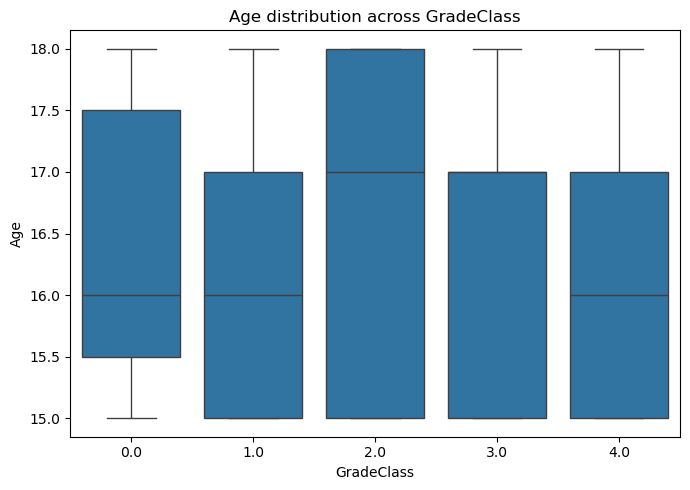

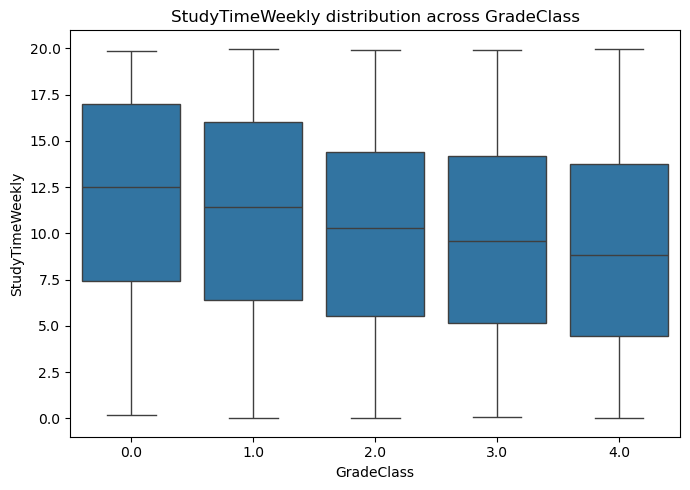

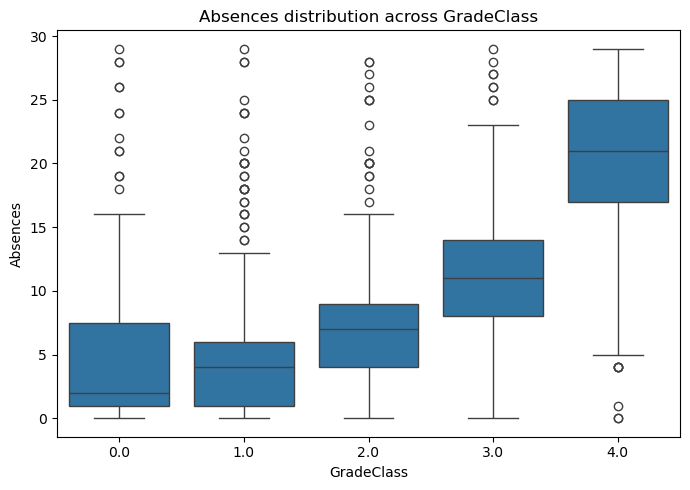

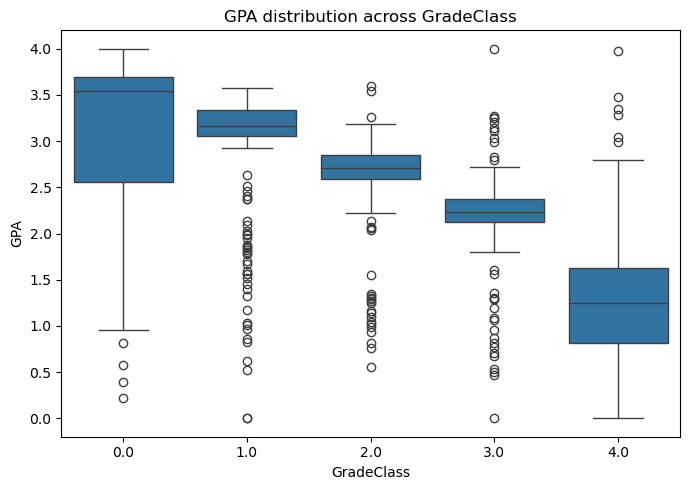

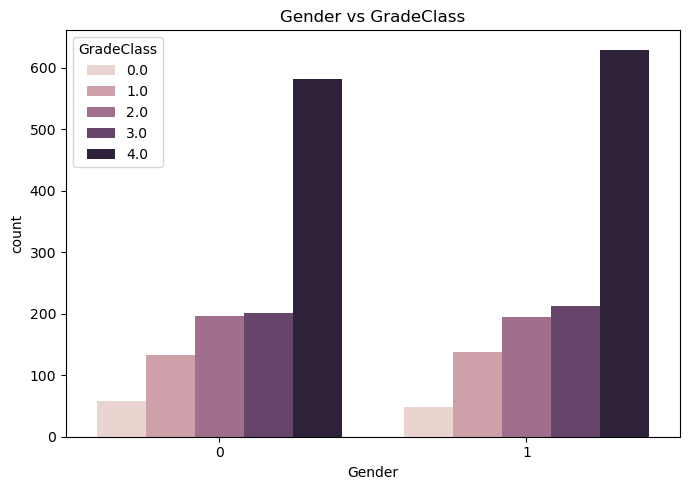

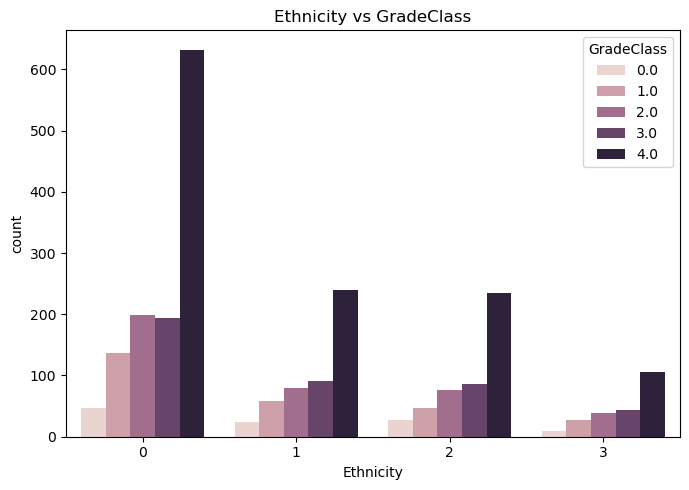

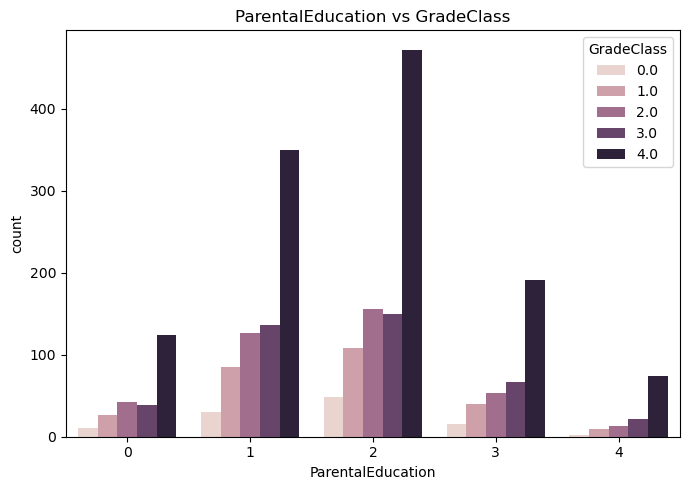

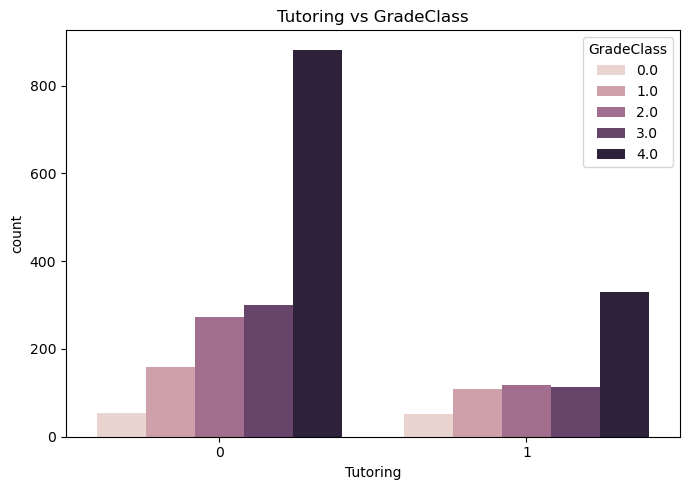

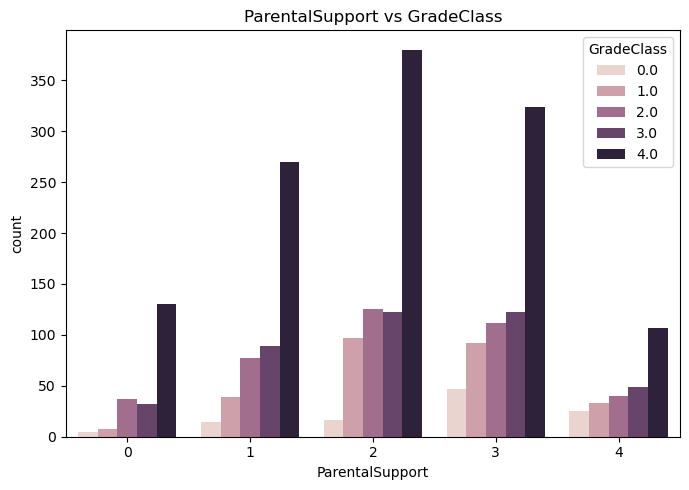

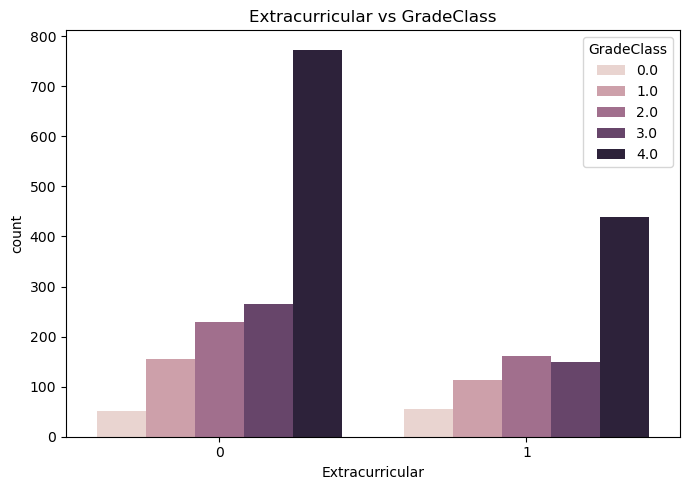

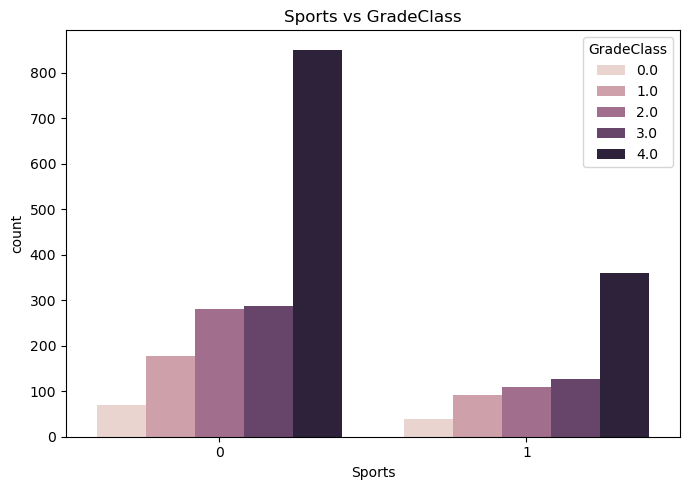

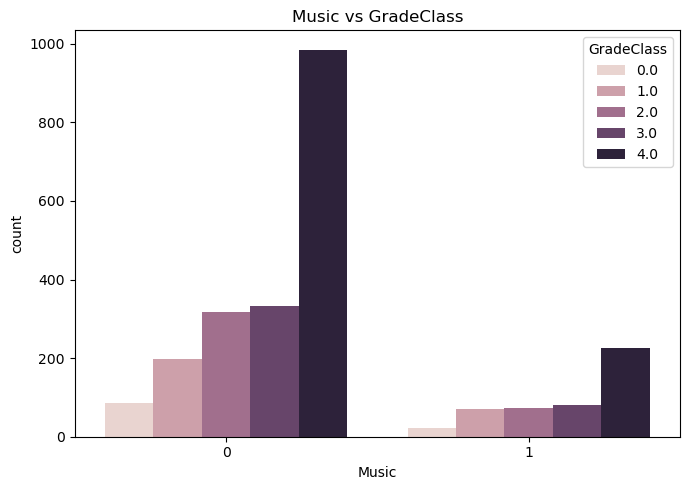

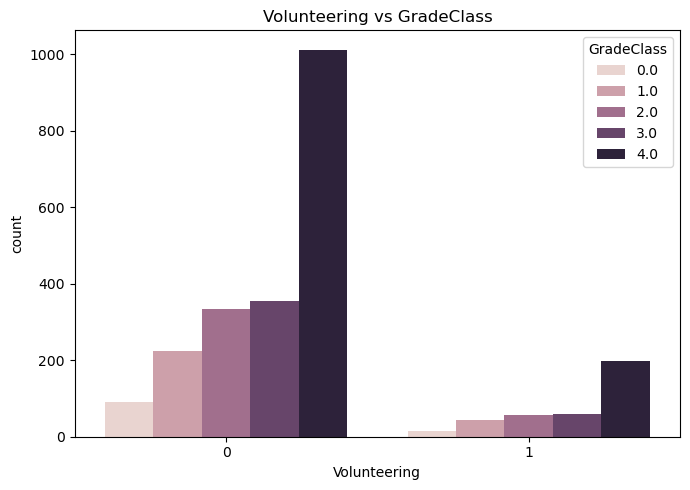

📊 Summary of Features Significantly Related to GradeClass:

          Feature        Type Significant
              Age   Numerical          No
  StudyTimeWeekly   Numerical         Yes
         Absences   Numerical         Yes
              GPA   Numerical         Yes
           Gender Categorical          No
        Ethnicity Categorical          No
ParentalEducation Categorical          No
         Tutoring Categorical         Yes
  ParentalSupport Categorical         Yes
  Extracurricular Categorical         Yes
           Sports Categorical          No
            Music Categorical          No
     Volunteering Categorical          No


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency
import numpy as np

df = pd.read_csv('Student_performance_data .csv')  

target = 'GradeClass'

# Define numerical and categorical features (excluding target)
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                        'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# -------------------------------
# NUMERICAL → CATEGORICAL (Box Plots)
# -------------------------------
for feature in numerical_features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x=target, y=feature)
    plt.title(f'{feature} distribution across {target}')
    plt.tight_layout()
    plt.show()

# -------------------------------
# CATEGORICAL → CATEGORICAL (Count Plots + Chi-Square)
# -------------------------------
chi_square_results = {}

for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=feature, hue=target)
    plt.title(f'{feature} vs {target}')
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()
    
    # Chi-square test
    contingency = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_square_results[feature] = p

# -------------------------------
# Show Chi-Square Test Results
# -------------------------------
summary = []

# Analyze numerical features
for feature in numerical_features:
    groups = [group[feature].dropna() for name, group in df.groupby(target)]
    _, p = f_oneway(*groups)
    significant = p < 0.05
    summary.append((feature, 'Numerical', "Yes" if significant else "No"))

# Analyze categorical features
for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df[target])
    _, p, _, _ = chi2_contingency(contingency)
    significant = p < 0.05
    summary.append((feature, 'Categorical', "Yes" if significant else "No"))

# Create and display final summary
results_df = pd.DataFrame(summary, columns=['Feature', 'Type', 'Significant'])
print("📊 Summary of Features Significantly Related to GradeClass:\n")
print(results_df.to_string(index=False))

   